In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv ('Highest Hollywood Grossing Movies.csv')

In [3]:
df.shape

(918, 11)

In [4]:
df.dtypes

Unnamed: 0                     int64
Title                         object
Movie Info                    object
Distributor                   object
Release Date                  object
Domestic Sales (in $)          int64
International Sales (in $)     int64
World Sales (in $)             int64
Genre                         object
Movie Runtime                 object
License                       object
dtype: object

In [5]:
df.describe()

,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $)
count,918.000000,9.180000e+02,9.180000e+02,9.180000e+02
mean,458.500000,1.677469e+08,2.301434e+08,3.968668e+08
std,265.148072,1.040360e+08,2.176011e+08,3.082629e+08
min,0.000000,8.036084e+07,2.600000e+02,8.160000e+07
25%,229.250000,1.016071e+08,8.845620e+07,2.005564e+08
50%,458.500000,1.321351e+08,1.638819e+08,3.019416e+08
75%,687.750000,1.913905e+08,2.885577e+08,4.750718e+08
max,917.000000,9.366622e+08,2.086739e+09,2.847246e+09


In [6]:
df.head(10)

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,16-Dec-15,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,24-Apr-19,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,16-Dec-09,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
5,5,Spider-Man: No Way Home (2021),"With Spider-Man's identity now revealed, Peter...",Sony Pictures Entertainment (SPE),NaN,675813257,868642706,1544455963,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 28 min,NaN
6,6,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,19-Dec-97,659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13
7,7,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,10-Jun-15,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13
8,8,The Avengers (2012),Earth's mightiest heroes must come together an...,Walt Disney Studios Motion Pictures,25-Apr-12,623357910,895457605,1518815515,"['Action', 'Adventure', 'Sci-Fi']",2 hr 23 min,PG-13
9,9,Star Wars: Episode VIII - The Last Jedi (2017),The Star Wars saga continues as new heroes and...,Walt Disney Studios Motion Pictures,13-Dec-17,620181382,712517448,1332698830,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 32 min,PG-13


In [7]:
df.at[0,'Movie Info']

'As a new threat to the galaxy rises, Rey, a desert scavenger, and Finn, an ex-stormtrooper, must join Han Solo and Chewbacca to search for the one hope of restoring peace.'

From df.describe and df.head I already see some basic cleaning needs to take place. Unnamed column is a duplicate index column. Also, dropping Movie Info column as that doesn't relate to the questions I have about the data. All the sales columns should be renamed for easier future refrencing in code. Further looking at NaN values present and deciding how to handle them. Also some of the data types need to be changed for example Movie Runtime and Release Date.

### Data cleaning

In [8]:
# Renaming columns
df.rename(columns = {'Domestic Sales (in $)': 'Domestic Sales',
                     'International Sales (in $)': 'International Sales',
                     'World Sales (in $)': 'World Sales'}, inplace = True)

In [9]:
df = df.drop (columns = ['Unnamed: 0','Movie Info'])

In [10]:
df

,Title,Distributor,Release Date,Domestic Sales,International Sales,World Sales,Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,16-Dec-15,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,24-Apr-19,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),Twentieth Century Fox,16-Dec-09,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...
913,The Notebook (2004),New Line Cinema,25-Jun-04,81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
914,Jimmy Neutron: Boy Genius (2001),Paramount Pictures,21-Dec-01,80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
915,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),13-Aug-10,80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,The Texas Chainsaw Massacre (2003),New Line Cinema,17-Oct-03,80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


In [11]:
df.isnull().sum()

Title                    0
Distributor              0
Release Date           118
Domestic Sales           0
International Sales      0
World Sales              0
Genre                    0
Movie Runtime            0
License                174
dtype: int64

Here we see a significant number of movies without a rating and some missing a release date. I will see which rating occurs most often and if it is over 70% of the movies I will fill in the missing values with the most popular rating. As for the release date, I notice the names of the movies all have the year attached. I will try to remove the year from the name and put it into a seperate column making it easier to analyze by year. 

In [12]:
df.nunique()

Title                  918
Distributor             34
Release Date           740
Domestic Sales         918
International Sales    913
World Sales            918
Genre                  309
Movie Runtime          101
License                  4
dtype: int64

In [13]:
df['License'].unique()

array(['PG-13', nan, 'PG', 'G', 'R'], dtype=object)

In [14]:
df['License'].value_counts()

PG-13    363
R        194
PG       173
G         14
Name: License, dtype: int64

Only around 40% of the highest grossing movies are PG-13 that isn't enough that I feel comfortable filling in the remaining movies with the same rating. When looking at data over the years most movies each year are PG-13 but there has been years where there's more R movies released.

In [15]:
#Converting runtime from object to timedelta
df['Movie Runtime'] = pd.to_timedelta(df['Movie Runtime'])
df['Movie Runtime']

0     0 days 02:18:00
1     0 days 03:01:00
2     0 days 02:42:00
3     0 days 02:14:00
4     0 days 02:29:00
            ...      
913   0 days 02:03:00
914   0 days 01:22:00
915   0 days 02:13:00
916   0 days 01:38:00
917   0 days 01:42:00
Name: Movie Runtime, Length: 918, dtype: timedelta64[ns]

Now with movie runtime in a data type that can be further analyzed. For example I could take the mean over the entire column or I could look at each distributor and find their range of movie runtimes. 

In [16]:
df['Movie Runtime'].mean()

Timedelta('0 days 01:56:34.248366013')

Here we can see the average runtime across the entire dataframe is 1 hour and 56 minutes.

In [17]:
df['Genre']

0                      ['Action', 'Adventure', 'Sci-Fi']
1             ['Action', 'Adventure', 'Drama', 'Sci-Fi']
2           ['Action', 'Adventure', 'Fantasy', 'Sci-Fi']
3                      ['Action', 'Adventure', 'Sci-Fi']
4                      ['Action', 'Adventure', 'Sci-Fi']
                             ...                        
913                                 ['Drama', 'Romance']
914    ['Action', 'Adventure', 'Animation', 'Comedy',...
915                    ['Biography', 'Drama', 'Romance']
916                                  ['Crime', 'Horror']
917           ['Comedy', 'Family', 'Fantasy', 'Romance']
Name: Genre, Length: 918, dtype: object

Genre is a bit of a mess. Each movie can have multiple genres or just one. I will later seperate them in the analysis as doing so now might make the df a bit disorganized. 

In [18]:
#Changing Release Date to datetime data type
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [19]:
df['Release Date']

0     2015-12-16
1     2019-04-24
2     2009-12-16
3            NaT
4            NaT
         ...    
913   2004-06-25
914   2001-12-21
915   2010-08-13
916   2003-10-17
917   2011-07-06
Name: Release Date, Length: 918, dtype: datetime64[ns]

While this is a usable formate it doesn't fix my missing values. But I do have an interest in both analyzing years of movie release and month seperately. 

In [20]:
df["Month"] = df["Release Date"].dt.month

In [21]:
df['Month']

0      12.0
1       4.0
2      12.0
3       NaN
4       NaN
       ... 
913     6.0
914    12.0
915     8.0
916    10.0
917     7.0
Name: Month, Length: 918, dtype: float64

I could use this method for year but it would still return NaN values so instead I will get the year from the title.

In [22]:
#This will get the year from the title by slicing
def ReleaseYear(df):
    for i in df.index:
        df.loc[i,'Release Year'] = df.loc[i,"Title"][-5:-1]

In [23]:
ReleaseYear(df)

In [24]:
df

,Title,Distributor,Release Date,Domestic Sales,International Sales,World Sales,Genre,Movie Runtime,License,Month,Release Year
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",0 days 02:18:00,PG-13,12.0,2015
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",0 days 03:01:00,PG-13,4.0,2019
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",0 days 02:42:00,PG-13,12.0,2009
3,Black Panther (2018),Walt Disney Studios Motion Pictures,NaT,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",0 days 02:14:00,NaN,NaN,2018
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,NaT,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",0 days 02:29:00,NaN,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...
913,The Notebook (2004),New Line Cinema,2004-06-25,81001787,36813370,117815157,"['Drama', 'Romance']",0 days 02:03:00,PG-13,6.0,2004
914,Jimmy Neutron: Boy Genius (2001),Paramount Pictures,2001-12-21,80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",0 days 01:22:00,NaN,12.0,2001
915,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),2010-08-13,80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",0 days 02:13:00,PG-13,8.0,2010
916,The Texas Chainsaw Massacre (2003),New Line Cinema,2003-10-17,80571655,26792250,107363905,"['Crime', 'Horror']",0 days 01:38:00,R,10.0,2003


In [25]:
df['Release Year'].isnull().sum()

0

In [26]:
df['Release Year'].unique()

array(['2015', '2019', '2009', '2018', '2021', '1997', '2012', '2017',
       '2008', '2016', '1999', '1977', '2004', '1982', '2013', '2006',
       '1994', '2010', '2002', '1993', '2011', '2003', '2005', '2014',
       '2007', '2001', '1983', '1996', '1980', '1990', '1975', '2000',
       '1989', '1981', '1984', '1973', '1991', '1992', '1998', '1985',
       '2020', '1978', '1937', '1995', '1988', '1987', '1986', '1972',
       '1955', '1953', '1979', '1970'], dtype=object)

Now I have a column that includes the year and has no null values. This will make graphing by year easier later on.

In [27]:
# Checking if world sales is accurate
df['World Sales Added'] = df['Domestic Sales'] + df['International Sales']
df['Is it equal?'] = df['World Sales Added'] == df['World Sales']
df[['Title','World Sales','World Sales Added','Is it equal?']].head()

,Title,World Sales,World Sales Added,Is it equal?
0,Star Wars: Episode VII - The Force Awakens (2015),2069521700,2069521700,True
1,Avengers: Endgame (2019),2797501328,2797501328,True
2,Avatar (2009),2847246203,2847246203,True
3,Black Panther (2018),1347597973,1347597973,True
4,Avengers: Infinity War (2018),2048359754,2048359754,True


In [28]:
df['Is it equal?'].value_counts()

True     889
False     29
Name: Is it equal?, dtype: int64

This shows discrepancies in the data. Not much I can do here with this. I would need the correct numbers for each of the 29 movies. Was more curious if there was any errors. I can check if the range is wide enough to change the order of the movies but I think for the overall EDA this wouldn't change much.

In [29]:
# Names of each Distributor
df.sort_values('Distributor', inplace = True)
df.Distributor.unique()

array(['20th Century Studios', 'Artisan Entertainment',
       'Columbia Pictures', 'Dimension Films', 'DreamWorks',
       'DreamWorks Distribution', 'FilmDistrict', 'Focus Features',
       'Fox Searchlight Pictures', 'IFC Films', 'Lionsgate',
       'Metro-Goldwyn-Mayer (MGM)', 'Miramax', 'New Line Cinema',
       'Newmarket Films', 'Orion Pictures', 'Paramount Pictures',
       'Relativity Media', 'Revolution Studios', 'Roadside Attractions',
       'STX Entertainment', 'Screen Gems', 'Sony Pictures Classics',
       'Sony Pictures Entertainment (SPE)', 'Summit Entertainment',
       'The Weinstein Company', 'TriStar Pictures',
       'Twentieth Century Fox', 'USA Films', 'United Artists',
       'United Artists Releasing', 'Universal Pictures',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.'],
      dtype=object)

We can see that the same studios appear twice with just slightly different names(DreamWorks, Sony, and United Artists). Also If I wanted to be nitpicky I could argue that 20th Century Studio and Fox Searchlight are the same studio since Disney bought them. But doing all that would realistically leave about 10 distributors.

In [30]:
df[df['Distributor'] == 'Sony Pictures Classics'].head()

,Title,Distributor,Release Date,Domestic Sales,International Sales,World Sales,Genre,Movie Runtime,License,Month,Release Year,World Sales Added,Is it equal?
480,"Crouching Tiger, Hidden Dragon (2000)",Sony Pictures Classics,2000-12-08,128078872,85446864,213525736,"['Action', 'Adventure', 'Drama', 'Fantasy', 'R...",0 days 02:00:00,PG-13,12.0,2000,213525736,True


In [31]:
df[df['Distributor'] == 'Sony Pictures Entertainment (SPE)'].head()

,Title,Distributor,Release Date,Domestic Sales,International Sales,World Sales,Genre,Movie Runtime,License,Month,Release Year,World Sales Added,Is it equal?
514,Cloudy with a Chance of Meatballs (2009),Sony Pictures Entertainment (SPE),2009-09-16,124870275,118135851,243006126,"['Adventure', 'Animation', 'Comedy', 'Drama', ...",0 days 01:30:00,PG,9.0,2009,243006126,True
610,Fun with Dick and Jane (2005),Sony Pictures Entertainment (SPE),2005-12-21,110332737,94349162,204681899,"['Comedy', 'Crime']",0 days 01:30:00,PG-13,12.0,2005,204681899,True
544,Total Recall (1990),Sony Pictures Entertainment (SPE),1990-06-01,119412921,141905000,261317921,"['Action', 'Adventure', 'Sci-Fi']",0 days 01:53:00,NaN,6.0,1990,261317921,True
312,2012 (2009),Sony Pictures Entertainment (SPE),2009-11-11,166112167,625105659,791217826,"['Action', 'Adventure', 'Sci-Fi']",0 days 02:38:00,PG-13,11.0,2009,791217826,True
506,Charlie's Angels (2000),Sony Pictures Entertainment (SPE),2000-11-03,125305545,138800000,264105545,"['Action', 'Adventure', 'Comedy', 'Crime', 'Th...",0 days 01:38:00,PG-13,11.0,2000,264105545,True


I wanted to double check that movies weren't duplicated by Distributor. Even though that would have been present when I ran df.nunique()

In [32]:
#Changing the names of some distributors for simplifaction
df.loc[df.Distributor == 'DreamWorks Distribution', 'Distributor'] = 'DreamWorks' 
df.loc[df.Distributor == 'United Artists Releasing', 'Distributor'] = 'United Artists' 
df.loc[df.Distributor == 'Sony Pictures Classics', 'Distributor'] = 'Sony Pictures Entertainment' 
df.loc[df.Distributor == 'Sony Pictures Entertainment (SPE)', 'Distributor'] = 'Sony Pictures Entertainment'

df.Distributor.unique()

array(['20th Century Studios', 'Artisan Entertainment',
       'Columbia Pictures', 'Dimension Films', 'DreamWorks',
       'FilmDistrict', 'Focus Features', 'Fox Searchlight Pictures',
       'IFC Films', 'Lionsgate', 'Metro-Goldwyn-Mayer (MGM)', 'Miramax',
       'New Line Cinema', 'Newmarket Films', 'Orion Pictures',
       'Paramount Pictures', 'Relativity Media', 'Revolution Studios',
       'Roadside Attractions', 'STX Entertainment', 'Screen Gems',
       'Sony Pictures Entertainment', 'Summit Entertainment',
       'The Weinstein Company', 'TriStar Pictures',
       'Twentieth Century Fox', 'USA Films', 'United Artists',
       'Universal Pictures', 'Walt Disney Studios Motion Pictures',
       'Warner Bros.'], dtype=object)

In [33]:
#Had to fix sort to index from Distributor
df.sort_index(inplace = True)
df

,Title,Distributor,Release Date,Domestic Sales,International Sales,World Sales,Genre,Movie Runtime,License,Month,Release Year,World Sales Added,Is it equal?
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",0 days 02:18:00,PG-13,12.0,2015,2069521700,True
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",0 days 03:01:00,PG-13,4.0,2019,2797501328,True
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",0 days 02:42:00,PG-13,12.0,2009,2847246203,True
3,Black Panther (2018),Walt Disney Studios Motion Pictures,NaT,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",0 days 02:14:00,NaN,NaN,2018,1347597973,True
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,NaT,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",0 days 02:29:00,NaN,NaN,2018,2048359754,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,The Notebook (2004),New Line Cinema,2004-06-25,81001787,36813370,117815157,"['Drama', 'Romance']",0 days 02:03:00,PG-13,6.0,2004,117815157,True
914,Jimmy Neutron: Boy Genius (2001),Paramount Pictures,2001-12-21,80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",0 days 01:22:00,NaN,12.0,2001,102992536,True
915,Eat Pray Love (2010),Sony Pictures Entertainment,2010-08-13,80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",0 days 02:13:00,PG-13,8.0,2010,204594016,True
916,The Texas Chainsaw Massacre (2003),New Line Cinema,2003-10-17,80571655,26792250,107363905,"['Crime', 'Horror']",0 days 01:38:00,R,10.0,2003,107363905,True


I believe the data is now ready for analysis. I can compare movies by each category of sales, by month or year, and by license.

# EDA

In [34]:
df['Month'].describe()

count    800.000000
mean       7.268750
std        3.205756
min        1.000000
25%        5.000000
50%        7.000000
75%       11.000000
max       12.000000
Name: Month, dtype: float64

In [35]:
df['Month'].value_counts()

6.0     124
12.0    113
7.0     101
5.0      92
11.0     88
3.0      59
8.0      50
10.0     48
2.0      40
4.0      34
9.0      32
1.0      19
Name: Month, dtype: int64

This was an expected answer. Movie studios tend to release their biggest films in the summer months. 

### Most profitable genre

In [36]:
df_genre = df['Genre'].str.replace('(\[|\]|\ |\')', '',regex=True)
df_genre

0                              Action,Adventure,Sci-Fi
1                        Action,Adventure,Drama,Sci-Fi
2                      Action,Adventure,Fantasy,Sci-Fi
3                              Action,Adventure,Sci-Fi
4                              Action,Adventure,Sci-Fi
                            ...                       
913                                      Drama,Romance
914    Action,Adventure,Animation,Comedy,Family,Sci-Fi
915                            Biography,Drama,Romance
916                                       Crime,Horror
917                      Comedy,Family,Fantasy,Romance
Name: Genre, Length: 918, dtype: object

In [37]:
df_genre = df_genre.str.get_dummies(sep=',')
df_genre

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
914,1,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
915,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
916,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [38]:
#Find the most common genre
df_genre.sum().sort_values(ascending = False)

Adventure      432
Comedy         399
Action         396
Drama          300
Thriller       230
Sci-Fi         228
Family         227
Fantasy        227
Romance        142
Animation      140
Crime          136
Mystery         87
Musical         51
Horror          45
Biography       39
Music           33
Sport           28
War             27
History         22
Western         14
Documentary      2
dtype: int64

In [39]:
#Calculating the total revenue per genre
df_genre_mul = df_genre.mul(df['World Sales'], axis=0)
df_genre_mul

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,2069521700,2069521700,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2069521700,0,0,0,0
1,2797501328,2797501328,0,0,0,0,0,2797501328,0,0,...,0,0,0,0,0,2797501328,0,0,0,0
2,2847246203,2847246203,0,0,0,0,0,0,0,2847246203,...,0,0,0,0,0,2847246203,0,0,0,0
3,1347597973,1347597973,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1347597973,0,0,0,0
4,2048359754,2048359754,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2048359754,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,0,0,0,0,0,0,117815157,0,0,...,0,0,0,0,117815157,0,0,0,0,0
914,102992536,102992536,102992536,0,102992536,0,0,0,102992536,0,...,0,0,0,0,0,102992536,0,0,0,0
915,0,0,0,204594016,0,0,0,204594016,0,0,...,0,0,0,0,204594016,0,0,0,0,0
916,0,0,0,0,0,107363905,0,0,0,0,...,107363905,0,0,0,0,0,0,0,0,0


In [40]:
#Adding revenue per genre
(df_genre_mul.sum()).sort_values(ascending = False)

Adventure      229470200349
Action         188363792761
Comedy         131008997340
Sci-Fi         122553076019
Fantasy        111657356323
Drama           98963789161
Family          98508710535
Thriller        82945767175
Animation       66703180691
Romance         46626573801
Crime           41356910524
Mystery         31177393515
Musical         22929353459
Horror          12288802095
Music           10198584468
Biography        9947363640
War              7249944157
Sport            6453245696
History          6398639386
Western          3717613627
Documentary       394132674
dtype: int64

Adventure is the highest earning genre. This doesn't make it the most profitable. I need to divide by the number of movies present with each genre to determine that.

In [41]:
(df_genre_mul.sum()/df_genre.sum()).sort_values(ascending = False)

Sci-Fi         5.375135e+08
Adventure      5.311810e+08
Fantasy        4.918826e+08
Animation      4.764513e+08
Action         4.756661e+08
Musical        4.495952e+08
Family         4.339591e+08
Thriller       3.606338e+08
Mystery        3.583608e+08
Drama          3.298793e+08
Romance        3.283562e+08
Comedy         3.283434e+08
Music          3.090480e+08
Crime          3.040949e+08
History        2.908472e+08
Horror         2.730845e+08
War            2.685165e+08
Western        2.655438e+08
Biography      2.550606e+08
Sport          2.304731e+08
Documentary    1.970663e+08
dtype: float64

This shows that Sci-Fi is the most profitable genre per movie.

### By Distributor

Text(0.5, 1.0, 'Highest World Sales by Distributor')

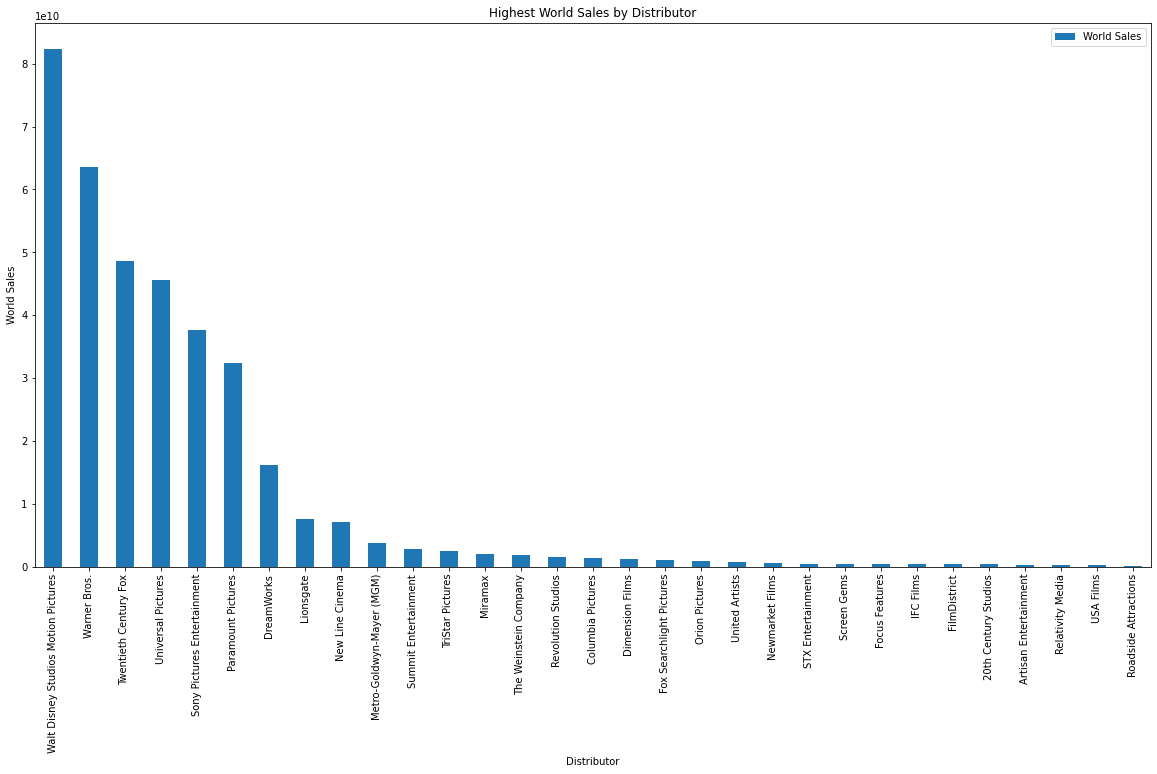

In [42]:
# Highest World Sales by Distributor
df_sales_dis = df.groupby('Distributor')['World Sales'].sum().to_frame().sort_values('World Sales', ascending = False)
df_sales_dis.plot.bar(figsize = (20,10))
plt.ylabel('World Sales')
plt.title('Highest World Sales by Distributor')

We can clearly see that Disney is significantly earned more than its competitors

Text(0.5, 1.0, 'Number of Movies by Distributor')

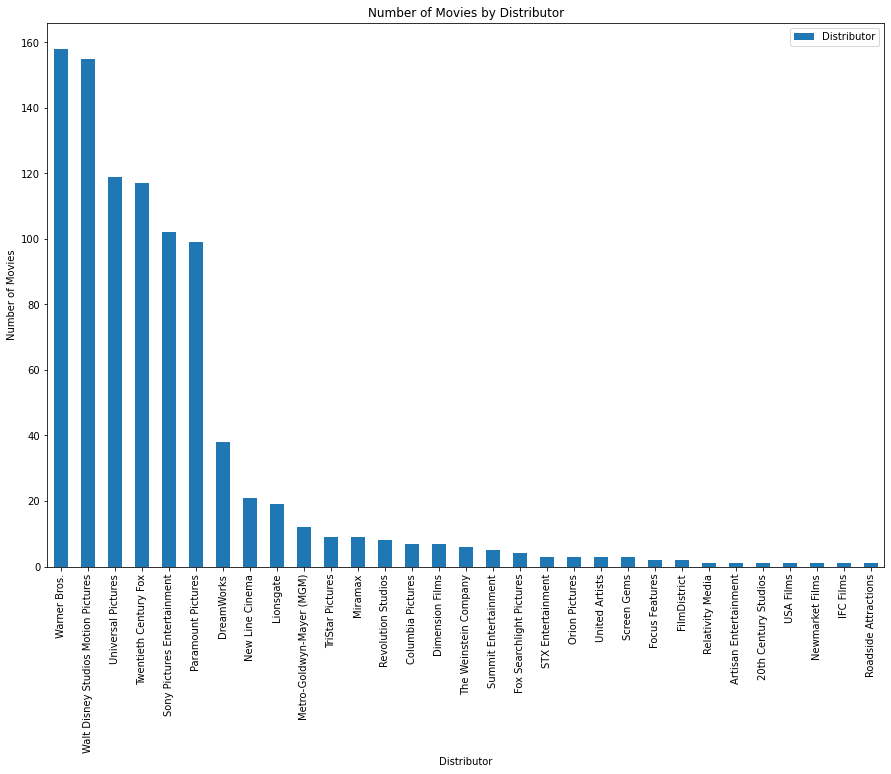

In [43]:
# Titles by Distributor
df_movies_dist = df['Distributor'].value_counts().to_frame().sort_values('Distributor', ascending = False)
df_movies_dist.plot.bar(figsize = (15, 10))
plt.xlabel('Distributor')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Distributor')

Both Warner Bros and Disney have a significant proportion of movies in the top grossing movies.

Text(0.5, 1.0, 'Domestic and World Sales per Distributor')

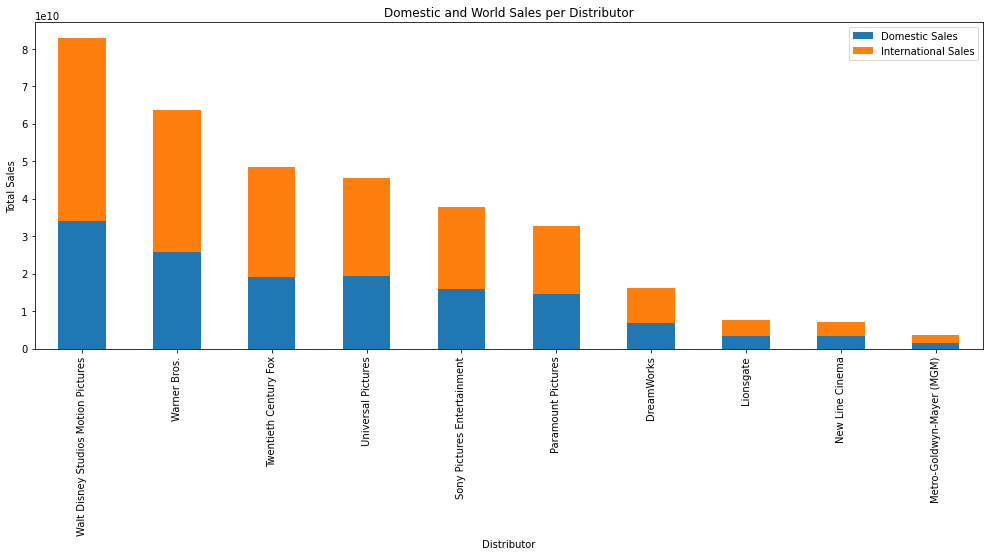

In [44]:
# Proportion of Domestic Sales and International Sales by Distributor
df_sales = df.groupby('Distributor')['Domestic Sales', 'International Sales', 'World Sales'].sum().sort_values('World Sales', ascending = False).head(10)
df_sales.plot.bar(y = ['Domestic Sales', 'International Sales'], stacked = True, figsize = (17, 6))
plt.ylabel('Total Sales')
plt.title('Domestic and World Sales per Distributor')

### Per Year Graphs

              World Sales
Release Year             
1937            184925486
1953             87404651
1955             93933394
1970             81600000
1972            246120986
1973            441306145
1975            471411300
1977           1012511191
1978            696722706
1979            281048285
1980            646560773
1981            475222971
1982            970110554
1983            583529926
1984            629686068
1985            682380478
1986            379319012
1987            167780960
1988           1042846978
1989           1446034137
1990           3383605098
1991           2542406060
1992           3803657824
1993           3558306529
1994           4770340499
1995           3888123694
1996           4869535373
1997           6856515258
1998           6059782085
1999           8284525653
2000           7202183128
2001           8818869144
2002          10420257479
2003          10764281938
2004          10714461642
2005           9011076805
2006        

Text(0.5, 1.0, 'World Sales Over the Years')

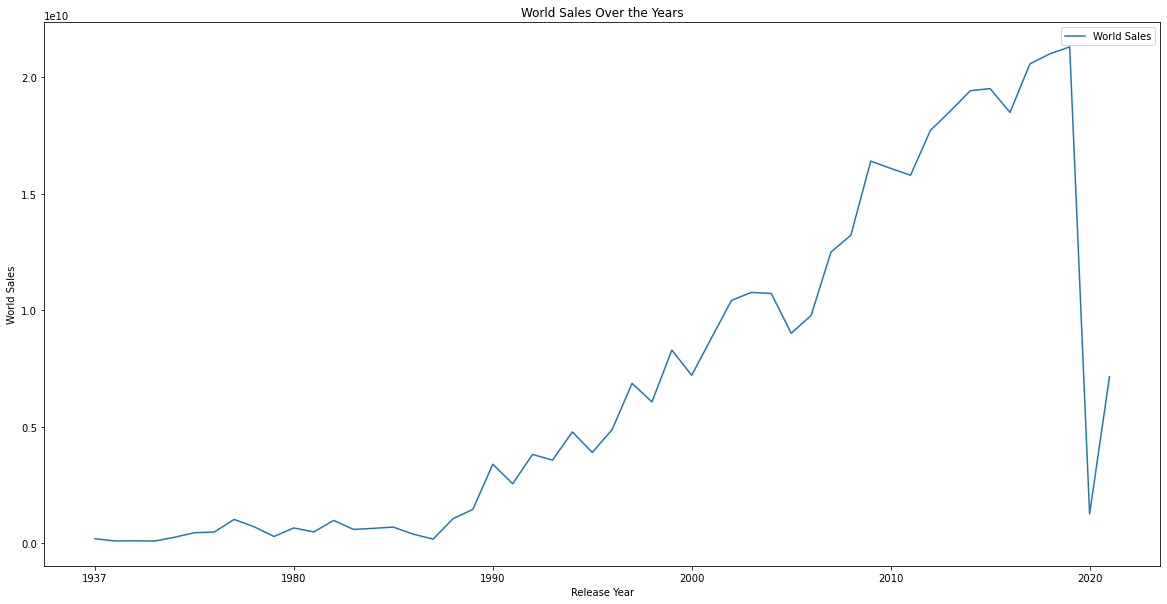

In [45]:
#Graphing World Sales per year
df_years = df['Release Year']

#Merging years and World Sales into one df
df_years = pd.concat([df_years, df['World Sales']],axis = 1)

#Dropping NaN values since the table has values from 0 to 2021
df_years = df_years.dropna()
df_years.set_index('Release Year', inplace = True)
df_years = df_years.groupby('Release Year').sum()

print(df_years)

df_years.plot.line(figsize = (20, 10))
plt.ylabel('World Sales')
plt.title('World Sales Over the Years')

Text(0.5, 1.0, 'Number of high grossing films per year')

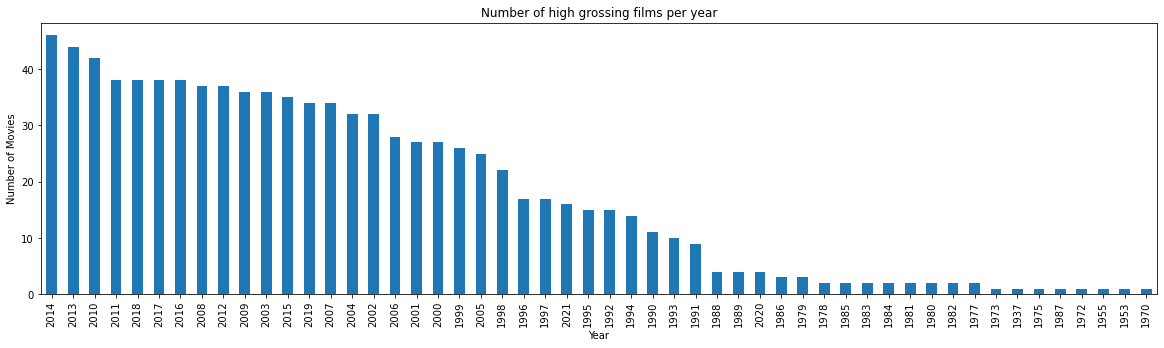

In [46]:
plt.figure(figsize=(20,5))
df['Release Year'].value_counts()
df['Release Year'].value_counts().plot.bar()
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of high grossing films per year')

Bar graph showing that 2014, 2013, and 2010 had multiple films that were high grossing

#### Extra Graphs that are less interesting

PG-13    363
R        194
PG       173
G         14
Name: License, dtype: int64

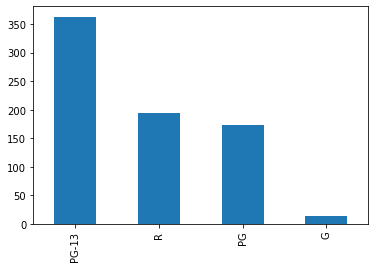

In [47]:
df['License'].value_counts().plot(kind='bar')
df['License'].value_counts()

What I was shotting for with this was trying to create multiple bar graphs by each distributor around how many movies they had with each licenses. I could only do it individual I couldn't figure out how to print all of them (or at least top 5) at once. 

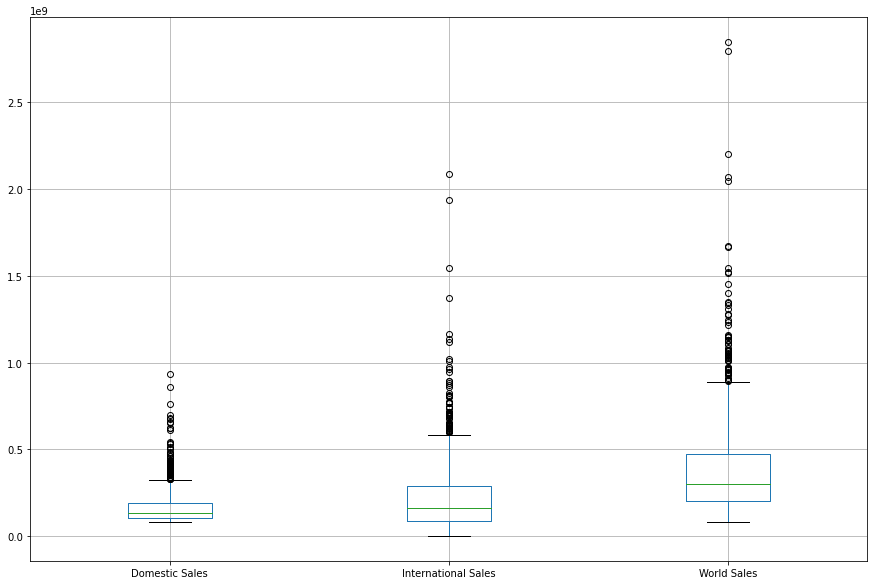

In [48]:
plt.figure(figsize=(15,10))
df.boxplot(column=['Domestic Sales', 'International Sales', 'World Sales'])
plt.show()

I figured boxplots would be boring since of course there's going to be outliers. The highest earning movies of all time will all appear as outliers when the other 900+ movies are factored in.

<AxesSubplot:>

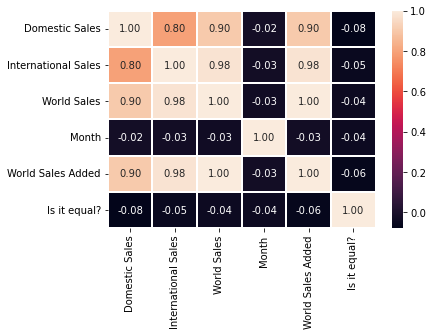

In [49]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

As expected a lot of linear correaltion when it comes to sales. Of course a movie that does well domesitcally will most likely do well international and vice versa. The rest of the columns have little effect on one another. 